In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
import markdown
import sys
import os
import itertools
import scipy as sc
import emcee
import corner
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
%config InlineBackend.figure_format = 'retina'





In [3]:

#path = '/Users/vs/Dropbox/Gaia/'
path = '/Users/vs522/Dropbox/Notes_on_papers/hogg_bovy_lang_2010'
os.chdir(path)



In [5]:
#df = pd.read_csv('test_output', sep=',', header=0, names=('x', 'y', 'sigma_y'))
df = pd.read_csv('table1.txt', delim_whitespace=True, header=0, names=('ID', 'x', 'y', 'sigma_y', 'sigma_x', 'rho_xy'))

In [6]:
df

,ID,x,y,sigma_y,sigma_x,rho_xy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84
9,10,158,416,16,7,-0.69


In [5]:
y = df.y[4:].values
x = df.x[4:].values
sig_y = df.sigma_y[4:].values


In [6]:
x,y,sig_y

(array([203,  58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186,
        125, 218, 146]),
 array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423,
        334, 533, 344]),
 array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22]))

In [7]:
A = np.vstack((np.ones(len(x)), x)).T
A.shape

(16, 2)

In [8]:
C = np.diag(sig_y*sig_y)

In [9]:
## this is the first matrix in equation 5

cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))

In [10]:
### substituted into the whole of equation 5

b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [11]:
b_ls, m_ls

(34.047727757542816, 2.2399208316310926)

In [12]:
### errors are the diagonals on the covariance matrix
## [0][0] corresponds to b, [1][1] corresponds to m

cov

array([[  3.32922601e+02,  -1.88954491e+00],
       [ -1.88954491e+00,   1.16166311e-02]])

0.0116166311233


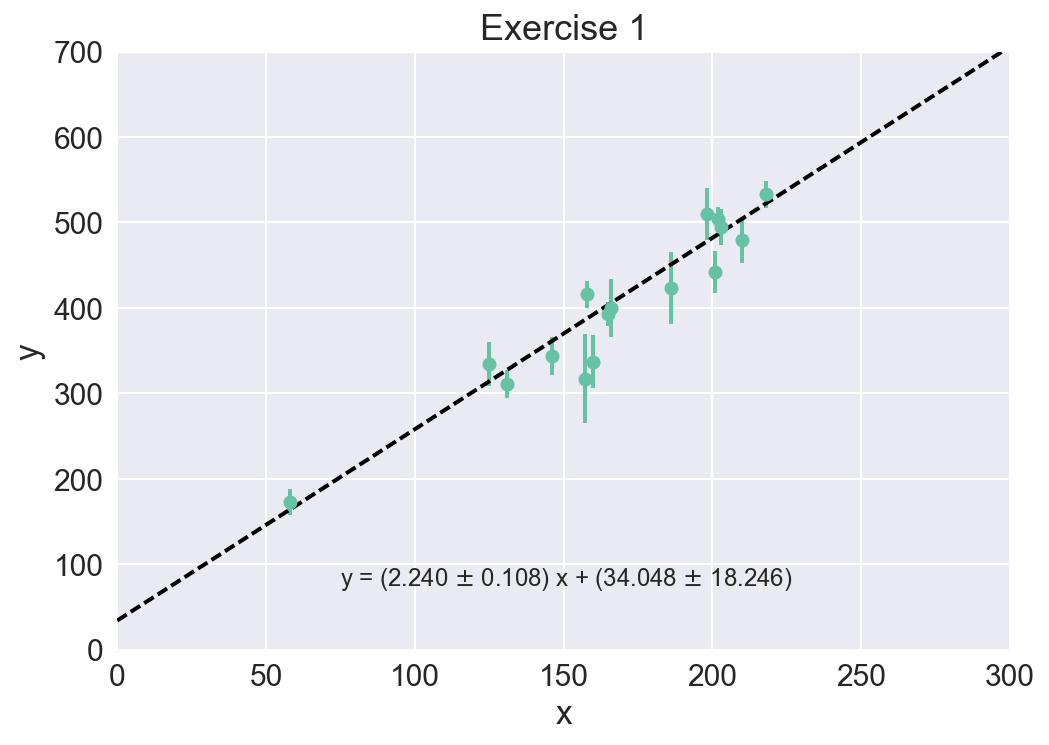

In [13]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

xfit = np.arange(0, 300, 1)

mp.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
mp.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Exercise 1')

plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

print(cov[1][1])

0.00599181008007


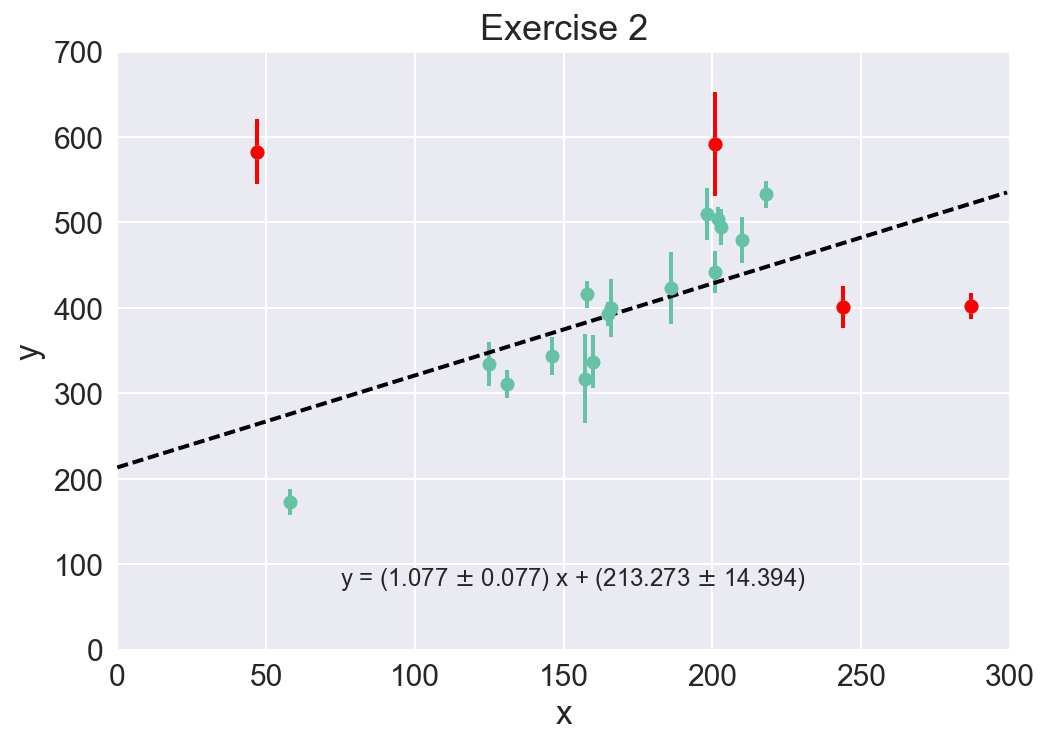

In [14]:
y = df.y.values
x = df.x.values
sig_y = df.sigma_y.values
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

xfit = np.arange(0, 300, 1)

mp.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
mp.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.errorbar(x[:4], y[:4], yerr=sig_y[:4], fmt='o', color='red')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Exercise 2')

plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

print(cov[1][1])

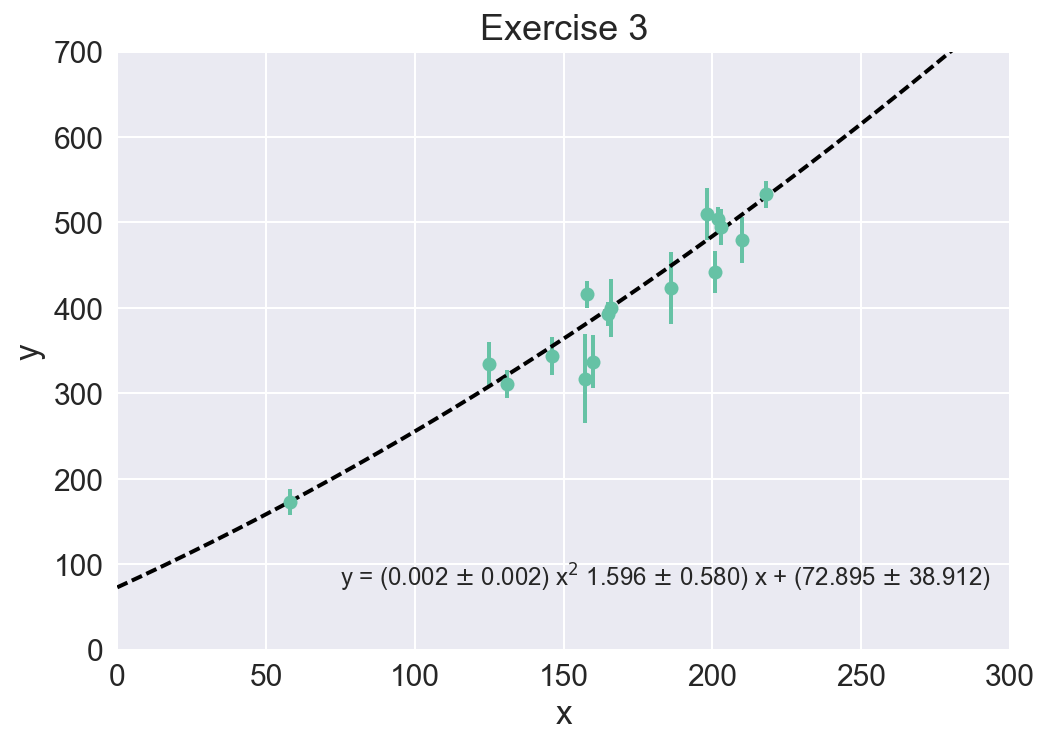

In [15]:
y = df.y[4:].values
x = df.x[4:].values
sig_y = df.sigma_y[4:].values
#A = np.vstack((np.ones(len(x)), x )).T
Q = np.vstack((np.ones(len(x)), x, x**2)).T

C = np.diag(sig_y*sig_y)
cov = np.linalg.inv(np.dot(Q.T, np.linalg.solve(C, Q)))
b_ls, m_ls, q_ls = np.dot(cov, np.dot(Q.T, np.linalg.solve(C, y)))

xfit = np.arange(0, 300, 1)

mp.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
mp.plot(xfit, b_ls + m_ls*xfit + q_ls*xfit**2, 'k--')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Exercise 3')

plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x$^2$ {2:.3f} $\pm$ {3:.3f}) x + ({4:.3f} $\pm$ {5:.3f})'.format(q_ls, np.sqrt(cov[2][2]), m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

## Exercise 4

$$ \ln \mathscr{L} = K - \displaystyle\sum_{i=1}^{N} \frac{\left[ t_{i} - T \right]}{2 \sigma_{ti}^{2}} $$

## Exercise 5

Come back to this

In [16]:
y = np.array(df.y.values).astype(float)
x = np.array(df.x.values).astype(float)
sig_y = np.array(df.sigma_y.values).astype(float)
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)


In [132]:
#### starting from scratch here

### following post from DFM

### defining sensible bounds for parameters

bounds = [(0.0, 50.0), (0.0, 3.0), (0, 1), (-50.0, 50.0), (-50.0, 50.)]

def ln_prior(params):
    ## putting uniform bounds on all the parameters here. 
    ### not so sure about the bounds on Ybad and Vbad right now, can change them later. 
    ### if any parameter is out of bounds, reject
    if not all(b[0] < v < b[1] for v, b in zip (params, bounds)):
        return -np.inf
    return 0


### separating the likelihood function into foreground (good) and background (bad)

def ln_like_fg(params):
    b, m, _, Ybad, lnV = params ### the underscore here means you're just throwing away that variable
    model = m*x + b
    return -0.5 * (((model - y / sig_y)**2) + 2*np.log(sig_y))

def ln_like_bg(params):
    _, _, Q, Ybad, lnV = params ### don't need b and m here because the background likelihood doesn't depend on them
    var = np.exp(lnV) + sig_y**2
    return - 0.5 * ((Ybad - y )**2 / var + np.log(var))

#### full probabilistic model

def ln_prob(params):
    b, m, Q, Ybad, lnV = params
    
    # check the prior - is this step good?
    lp = ln_prior(params)
    if not np.isfinite(lp):
        return -np.inf, None
    
    ### if the prior is good, compute the vector of fg likelihoods, and include the Q prior
    ll_fg = ln_like_fg(params)
    ll_fg_q = ll_fg + np.log(Q)
    
    ## do the same for the background (bad points) likelihoods
    ll_bg = ln_like_bg(params)
    ll_bg_q = ll_bg + np.log(1.0 - Q)
    
    ### combine the fg and bg likelihoods using logaddexp because it's more stable
    
    log_like = np.sum(np.logaddexp(ll_fg_q, ll_bg_q))
    
    return lp + log_like, (ll_fq_q, ll_bg_q)
    
    
def ln_like_lsq(params, x, y, yvar):
    b, m = params
    model = m*x + b
    return -0.5*(np.sum((y-model)**2*(1./yvar**2) - np.log(1./yvar**2)))


In [101]:
import scipy.optimize as op
nll = lambda *args: -ln_like_lsq(*args)
result = op.minimize(nll, [30, 1.0], args=(x, y, sig_y))
#b, m, 0.15,np.mean(y),np.var(y)  = result["x"]

In [102]:
initial_params = [result["x"][0], result["x"][1], 0.15,np.mean(y),np.var(y)]

In [103]:
initial_params

[213.27387396760054,
 1.0767455715088561,
 0.15,
 419.44999999999999,
 9953.0474999999988]

0.00599181008007


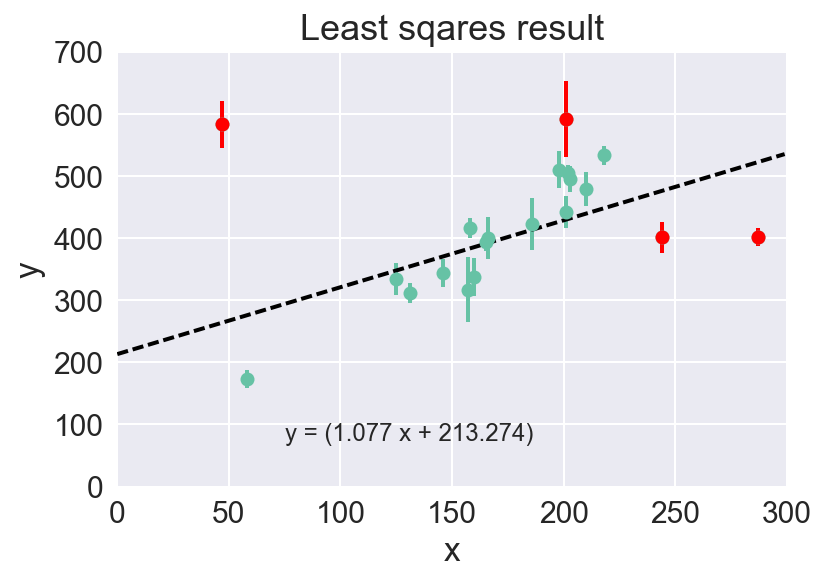

In [110]:
y = df.y.values
x = df.x.values
sig_y = df.sigma_y.values
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

xfit = np.arange(0, 300, 1)

mp.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
mp.plot(xfit,  result["x"][1]*xfit +  result["x"][0], 'k--')
mp.errorbar(x[:4], y[:4], yerr=sig_y[:4], fmt='o', color='red')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Least sqares result')

plot_text = 'y = ({0:.3f} x + {1:.3f})'.format(result["x"][1], result["x"][0])
mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

print(cov[1][1])

In [133]:
ndim = 5
nwalkers = 100


In [134]:
pos0 = [initial_params + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_prob)



In [135]:
print("Running MCMC...")
pos, _, _, _ = sampler.run_mcmc(pos0, 500)
print("Done.")

Running MCMC...


/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


Done.


In [136]:
sampler.reset()
sampler.run_mcmc(pos, 1500);

/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


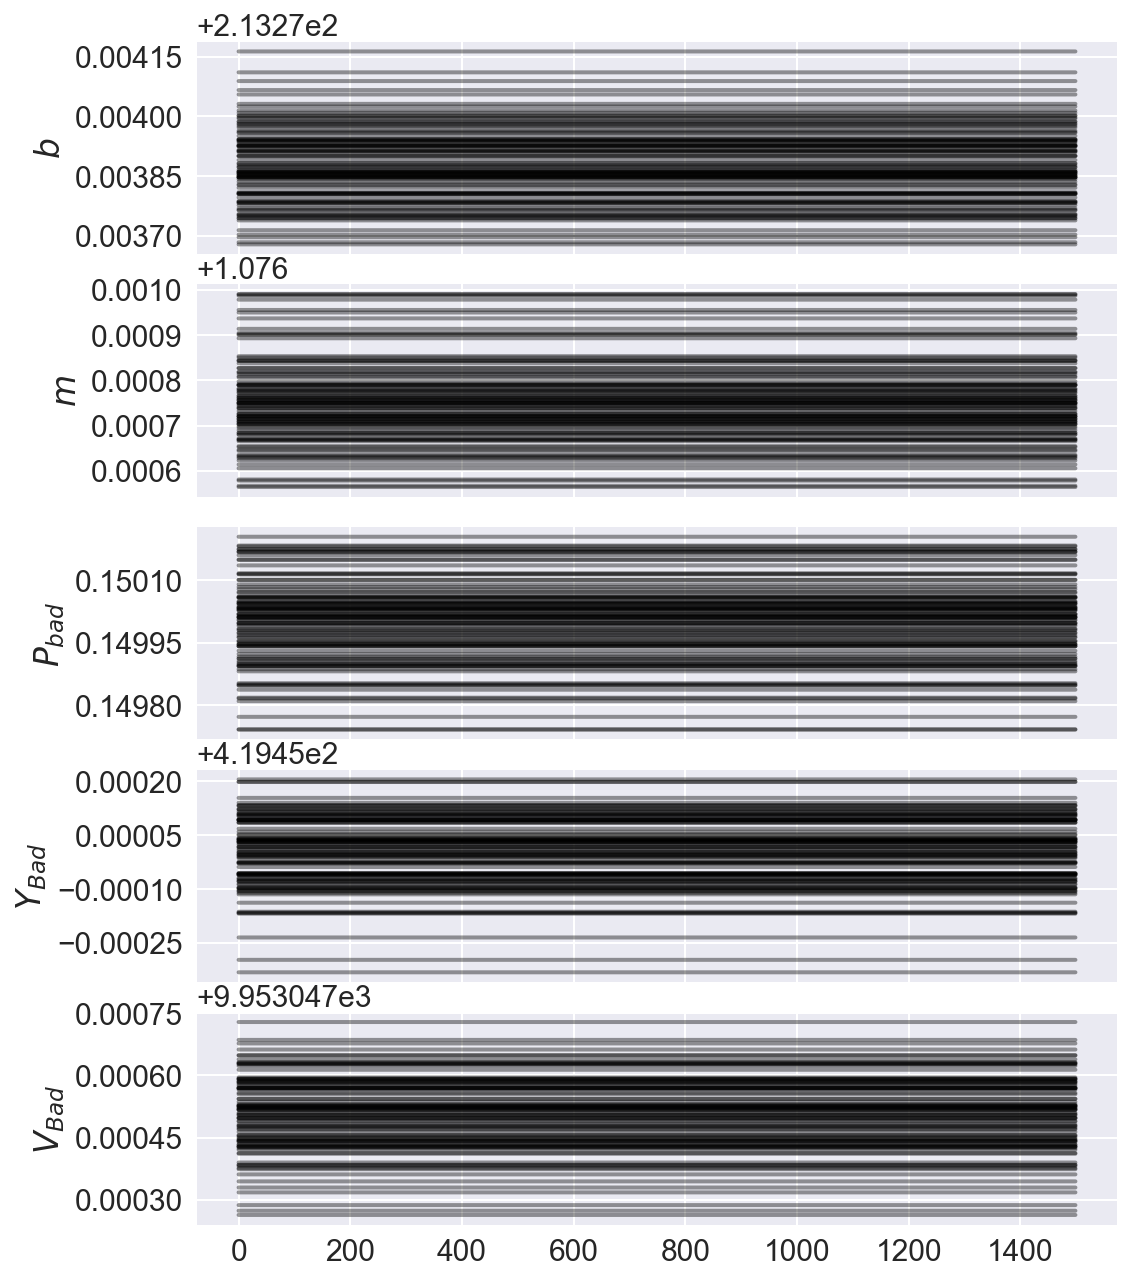

In [137]:
mp.clf()
fig, axes = mp.subplots(5, 1, sharex=True, figsize=(8, 9))
axes[0].plot(sampler.chain[:, :, 0].T, color="k", alpha=0.4)
axes[0].yaxis.set_major_locator(MaxNLocator(5))
axes[0].set_ylabel("$b$")

axes[1].plot(sampler.chain[:, :, 1].T, color="k", alpha=0.4)
axes[1].yaxis.set_major_locator(MaxNLocator(5))
axes[1].set_ylabel("$m$")

axes[2].plot(sampler.chain[:, :, 2].T, color="k", alpha=0.4)
axes[2].yaxis.set_major_locator(MaxNLocator(5))
axes[2].set_ylabel("$P_{bad}$")

axes[3].plot(sampler.chain[:, :, 3].T, color="k", alpha=0.4)
axes[3].yaxis.set_major_locator(MaxNLocator(5))
axes[3].set_ylabel("$Y_{Bad}$")

axes[4].plot(sampler.chain[:, :, 4].T, color="k", alpha=0.4)
axes[4].yaxis.set_major_locator(MaxNLocator(5))
axes[4].set_ylabel("$V_{Bad}$")



fig.tight_layout(h_pad=0.0)
mp.show()

In [96]:
burnin = 50
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))

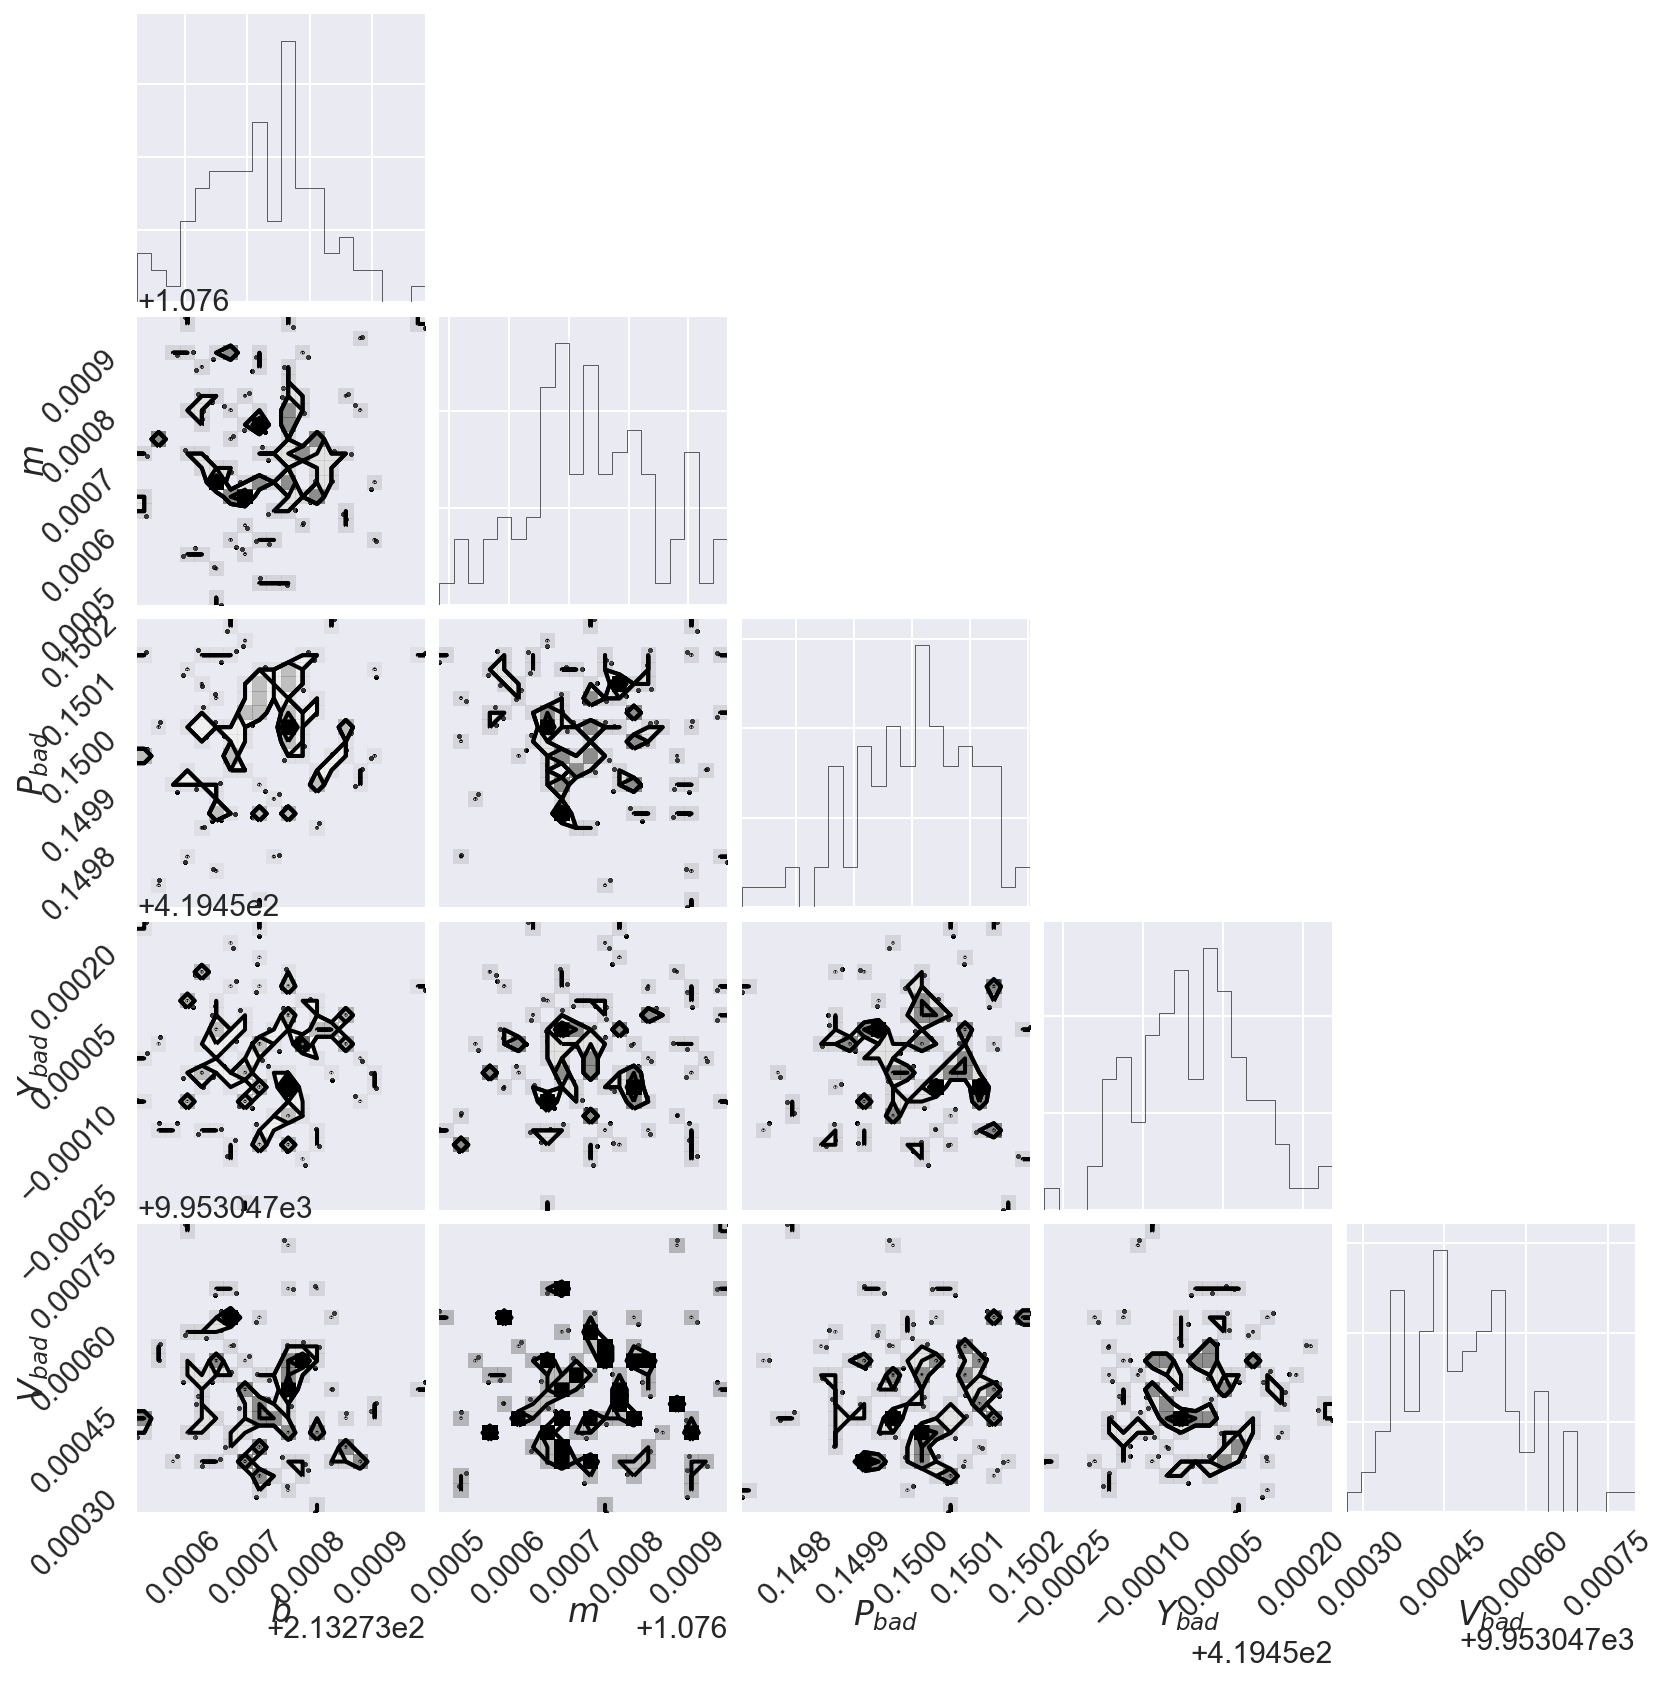

In [138]:
fig = corner.corner(samples, labels=["$b$", "$m$", "$P_{bad}$", '$Y_{bad}$', '$V_{bad}$'])

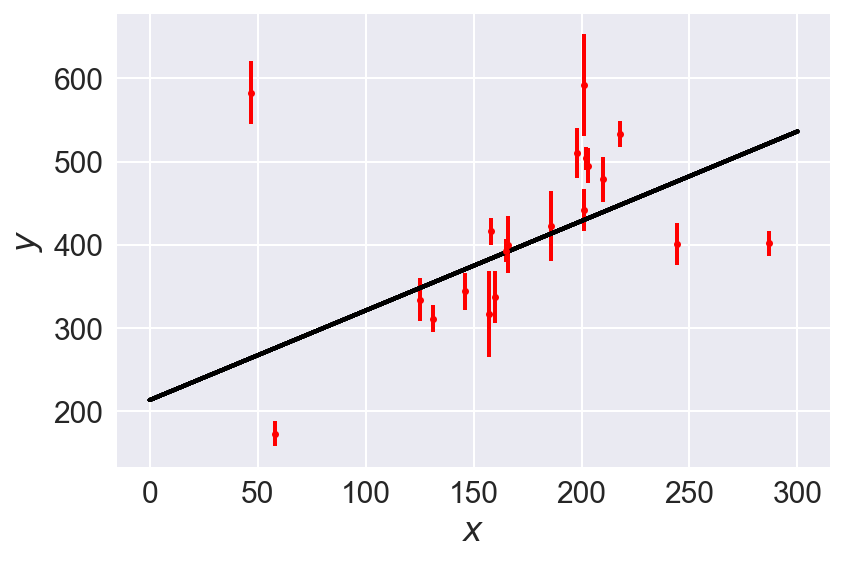

In [98]:
xl = np.array([0, 300])


mp.figure()
for b, m, pbad, ybad, vbad in samples[np.random.randint(len(samples), size=100)]:
    mp.plot(xl, m*xl+b, color="k", alpha=0.1)
mp.errorbar(x, y, yerr=sig_y, fmt=".r")
mp.xlabel("$x$")
mp.ylabel("$y$")
mp.tight_layout()



In [65]:
b_mcmc, m_mcmc, pbad_mcmc, ybad_mcmc, vbad_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
print("""MCMC result:
    b = {0[0]} +{0[1]} -{0[2]})
    m = {1[0]} +{1[1]} -{1[2]})
    pbad = {2[0]} +{2[1]} -{2[2]})
    ybad = {3[0]} +{3[1]} -{3[2]})
    vbad = {4[0]} +{4[1]} -{4[2]})



""".format(b_mcmc, m_mcmc, pbad_mcmc, ybad_mcmc, vbad_mcmc))

MCMC result:
    b = 213.27371971858213 +9.38767135494345e-05 -7.753878799121594e-05)
    m = 1.076763898317926 +8.669816146888998e-05 -9.647725497607951e-05)
    pbad = 0.1500103096974163 +7.235424171875282e-05 -9.492403689109752e-05)
    ybad = 419.44999561899743 +0.0001033693009730996 -8.259411453082066e-05)
    vbad = 9953.047506145509 +8.342143519257661e-05 -0.00010196527910011355)






In [30]:
print('Doing ', NSTEPS, 'steps of MCMC...')
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams)
    p = posterior(newparams, x, y, sig_y)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print(nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams)
print('acceptance fraction', (naccepts/float(nsteps)))     

NameError: name 'NSTEPS' is not defined

In [ ]:
xfit = np.arange(0, 300, 1)

ax1 = mp.subplot(111)

ax1.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Marginalized over bad data')

#plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
#mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 10 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:10]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.3)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

for(p, params) in chain[Nchain/2:]:
    (b, m, Pbad, Ybad, Vbad) = params
    #print params
    params_bgp = params
    params_fgp = params
    params_bgp[2] = 1.0
    params_fgp[2] = 0.0
    bgp += Pbad * single_point_likelihoods(x, y, sig_y, *params_bgp)
    fgp += (1.0-Pbad) * single_point_likelihoods(x, y, sig_y, *params_fgp)
    bgodds = bgp / fgp
    
    for i, bgo in enumerate(bgodds):
        if bgo < 1:
            continue
        dxl = (xmax - xmin) * 0.01
        dy1 = (ymax - ymin) * 0.01

In [ ]:
ax2 = mp.subplot(111)

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])

Pbads = np.array([Pbad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
Ybads = np.array([Ybad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
Vbads = np.array([Vbad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


antigray = LinearSegmentedColormap('antigray', {'red':   ((0., 1, 1), (1., 0, 0)), 'green': ((0., 1, 1), (1., 0, 0)), 'blue':  ((0., 1, 1), (1., 0, 0))})

(H, xe, ye) = np.histogram2d(ms, bs, bins=(100, 100))
print 'max H:', H.max()

ax2.imshow(np.log(1 + H.T), extent=(xe.min(), xe.max(), ye.min(), ye.max()), aspect='auto', cmap=antigray)
mp.xlabel('slope')
mp.ylabel('intercept')

In [ ]:
I = Nchain / 2 + np.random.permutation(Nchain/2)[:100]


In [ ]:
print np.mean(ms), np.mean(bs), np.mean(Pbads), np.mean(Ybads), np.mean(Vbads)

In [ ]:
fig, ax = mp.subplots(5)
ax[0].hist(ms)
ax[1].hist(bs)
ax[2].hist(Pbads)
ax[3].hist(Ybads)
ax[4].hist(Vbads)

In [ ]:
path = '/Users/vs/Dropbox/Gaia/'
os.chdir(path)

df = pd.read_csv('test_output', sep=',', header=0, names=('x', 'y', 'sigma_y'))



In [ ]:
y = np.array(df.y.values).astype(float)
x = np.array(df.x.values).astype(float)
sig_y = np.array(df.sigma_y.values).astype(float)
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)



In [ ]:
print bestfit

In [ ]:
def single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad):   
    return np.array(((1 - Pbad) / np.sqrt(2.*np.pi*yvar) * np.exp(-0.5 * (y - m*x - b)**2 / yvar) +
            Pbad / np.sqrt(2.*np.pi * Vbad) * np.exp(-0.5 * (y - Ybad)**2 / Vbad)))

def likelihood(params, x, y, yvar):
    b = params[0]
    m = params[1]
    Pbad = params[2] ## prior probability a point is bad
    Ybad = params[3] ## Mean of bad points
    Vbad = params[4] ## Variance of bad points
    
    return np.array(np.prod(single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad)))

    
    
def prior(params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    return np.array((Pbad >= 0) * (Pbad < 1) * (Vbad > 0))

def posterior(params, x, y, yerr):
    post = likelihood(params, x, y, yerr) * prior(params)
    if not np.isfinite(post):
        return -np.inf
    return post

def ln_like(params, x, y, yvar):
    b = params[0]
    m = params[1]
    Pbad = params[2] ## prior probability a point is bad
    Ybad = params[3] ## Mean of bad points
    Vbad = params[4] ## Variance of bad points
    
    return np.array(np.sum(single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad)))

def ln_prior(params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    if (Pbad >= 0) and (Pbad < 1) and (Vbad > 0) and m > -10 and m < 10 and b < 10000 and b > -10000:
        return 0
    return -np.inf

def ln_posterior(params, x, y, yerr):
    post = ln_like(params, x, y, yerr) + ln_prior(params)
    if not np.isfinite(post):
        return -np.inf
    return post


In [ ]:
### Tried doing this with emcee but I still don't understand it

def pick_new_parameters(nsteps, params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    mscale = 0.106 ## from m4 paper
    bscale = 1.
    # burn-in slope and intercept
    if nsteps > 10000:
        pbadscale = 0.1
        ybadscale = bscale
        vbadscale = 10.
    else:
        pbadscale = 0
        ybadscale = 0
        vbadscale = 0
    newb = b + bscale * np.random.normal()
    #newm = m + mscale * np.random.normal()
    ## fixing the slope to M4 value
    newm = -2.332 + mscale * np.random.normal()
    newPbad = Pbad + pbadscale * np.random.normal()
    newYbad = Ybad + ybadscale * np.random.normal()
    newVbad = Vbad + vbadscale * np.random.normal()
    newparams = np.array([newb, newm, newPbad, newYbad, newVbad])
    return (newparams)


In [ ]:
np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], -2.332, Pbad, Ybad, Vbad])

In [ ]:
p = posterior(params, x, y, sig_y)
print 'starting p = ', p

In [ ]:
chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

In [ ]:
print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters_freeslope(nsteps, oldparams)
    p = posterior(newparams, x, y, sig_y)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

In [ ]:
xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)

ax1.errorbar(x, y, yerr=sig_y, fmt='o', color=col, zorder=4)
#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -2.5)
mp.xlabel('log P')
mp.ylabel('mag')
mp.title('Marginalized over bad data')

#plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
#mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 10 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:100]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.1)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

for(p, params) in chain[Nchain/2:]:
    (b, m, Pbad, Ybad, Vbad) = params
    #print params
    params_bgp = params
    params_fgp = params
    params_bgp[2] = 1.0
    params_fgp[2] = 0.0
    bgp += Pbad * single_point_likelihoods(x, y, sig_y, *params_bgp)
    fgp += (1.0-Pbad) * single_point_likelihoods(x, y, sig_y, *params_fgp)
    bgodds = bgp / fgp
    
    for i, bgo in enumerate(bgodds):
        if bgo < 1:
            continue
        dxl = (xmax - xmin) * 0.01
        dy1 = (ymax - ymin) * 0.01

In [ ]:
ax2 = mp.subplot(111)

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])

Pbads = np.array([Pbad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
Ybads = np.array([Ybad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
Vbads = np.array([Vbad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


antigray = LinearSegmentedColormap('antigray', {'red':   ((0., 1, 1), (1., 0, 0)), 'green': ((0., 1, 1), (1., 0, 0)), 'blue':  ((0., 1, 1), (1., 0, 0))})

(H, xe, ye) = np.histogram2d(ms, bs, bins=(100, 100))
print 'max H:', H.max()

ax2.imshow(np.log(1 + H.T), extent=(xe.min(), xe.max(), ye.min(), ye.max()), aspect='auto', cmap=antigray)
mp.xlabel('slope')
mp.ylabel('intercept')

In [ ]:
print np.mean(ms), np.mean(bs), np.mean(Pbads), np.mean(Ybads), np.mean(Vbads)
print np.std(ms), np.std(bs), np.std(Pbads), np.std(Ybads), np.std(Vbads)

In [ ]:
### Tried doing this with emcee but I still don't understand it

def pick_new_parameters_freeslope(nsteps, params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    mscale = 0.106 ## from m4 paper
    bscale = 0.069 ### median uncertaintiy on y
    # burn-in slope and intercept
    if nsteps > 10000:
        pbadscale = 0.1
        ybadscale = bscale
        vbadscale = 10.
    else:
        pbadscale = 0
        ybadscale = 0
        vbadscale = 0
    newb = b + bscale * np.random.normal()
    #newm = m + mscale * np.random.normal()
    ## fixing the slope to M4 value
    newm = m + mscale * np.random.normal()
    newPbad = Pbad + pbadscale * np.random.normal()
    newYbad = Ybad + ybadscale * np.random.normal()
    newVbad = Vbad + vbadscale * np.random.normal()
    newparams = np.array([newb, newm, newPbad, newYbad, newVbad])
    return (newparams)


In [ ]:
np.mean(sig_y)

In [ ]:
fig, ax = mp.subplots(2, sharex=True)
ax[0].plot(ms, '-k', alpha=0.2)
ax[1].plot(bs, '-k', alpha=0.2)

In [ ]:
mp.hist(ms)

In [ ]:
mp.hist(bs)

In [ ]:
y = np.array(df.y.values).astype(float)
x = np.array(df.x.values).astype(float)
sig_y = np.array(df.sigma_y.values).astype(float)
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

In [ ]:
ndim, nwalkers = 5, 100
pos = [params + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(x, y, sig_y))

In [ ]:
sampler.run_mcmc(pos, 500);

In [ ]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [ ]:
fig, axes = mp.subplots(5, 1, sharex=True, figsize=(8, 9))
axes[0].plot(sampler.chain[:, :, 0].T, color="k", alpha=0.4)
axes[0].yaxis.set_major_locator(MaxNLocator(5))
axes[0].set_ylabel("$b$")

axes[1].plot(sampler.chain[:, :, 1].T, color="k", alpha=0.4)
axes[1].yaxis.set_major_locator(MaxNLocator(5))
axes[1].set_ylabel("$m$")

axes[2].plot(np.exp(sampler.chain[:, :, 2]).T, color="k", alpha=0.4)
axes[2].yaxis.set_major_locator(MaxNLocator(5))
axes[2].set_ylabel("$Pb$")

axes[3].plot(np.exp(sampler.chain[:, :, 3]).T, color="k", alpha=0.4)
axes[3].yaxis.set_major_locator(MaxNLocator(5))
axes[3].set_ylabel("$Yb$")

axes[4].plot(np.exp(sampler.chain[:, :, 4]).T, color="k", alpha=0.4)
axes[4].yaxis.set_major_locator(MaxNLocator(5))
axes[4].set_ylabel("$Vb$")


axes[4].set_xlabel("step number")


In [ ]:
xfit = np.arange(-1, 1, 0.1)


for b, m, Pb, yb, Vb, in samples[np.random.randint(len(samples), size=100)]:
    mp.plot(xfit, m*xfit+b, color="k", alpha=0.1)
#pl.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
mp.errorbar(x, y, yerr=sig_y, fmt=".k")

mp.xlim(-0.6, -0.1)
mp.ylim(1, -2.5)
mp.xlabel('log P')
mp.ylabel('mag')
mp.title('Marginalized over bad data')

#

In [127]:
def print_x(q):
    print('q is ', q)
    print('x is ', x)
    return 0

In [130]:
x = 15


In [131]:
print_x(6)

q is  6
x is  15


0